In [ ]:
---
title: "Test"
format: html
---

In [51]:
using Plots
using DataFrames
using CSV
using Downloads
using GLM
using CategoricalArrays
using StatsBase
using FreqTables
using StatsPlots


In [7]:
myarray = [1,2,3,4]
mya2 = [5,6,7,8]
df = DataFrame(x = myarray, y = mya2)

function is_four(x)
    return x == 4
end

map(is_four, myarray)
is_four(myarray)
filter(:x => is_four, df)



,x,y
,Int64,Int64
1,4,8


In [8]:
mtcars = "https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv"

"https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv"

In [16]:
# read mtcars 
# using Downloads.download() to first download the file
# then reading the file using CSV package, then
# passing the data to DataFrame

carsdf = Downloads.download(mtcars) |>
 CSV.File |>
 DataFrame

## first three rows
first(carsdf, 3) 

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs
,String31,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Int64
1,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0
2,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0
3,Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1


In [17]:
# filter all cars that have hp > 100
# first define a function

function gt100(x)
    return x > 100
end

# then filter carsdf data set with this function to store it in a different dataset
# apply the filter() 
# to the dataset carsdf
# and pass the hp variable to the gt100() 
# to filter all cars with hp > 100

carsdf2 = filter(:hp => gt100, carsdf)

# inspect the first three rows
first(carsdf2, 3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs
,String31,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Int64
1,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0
2,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1


In [18]:
# Select model, mpg, cyl, disp, hp, wt from this data set
# use the select() and pass the data frame,
# then select which columns you want
# the columns are prefaced with a :
# and store this new data to carsdf3
carsdf3 = select(carsdf2, [:model, :mpg, :cyl, :disp, :hp, :wt])
# check the first three rows
first(carsdf3, 3)

,model,mpg,cyl,disp,hp,wt
,String31,Float64,Int64,Float64,Int64,Float64
1,Mazda RX4,21.0,6,160.0,110,2.62
2,Mazda RX4 Wag,21.0,6,160.0,110,2.875
3,Hornet 4 Drive,21.4,6,258.0,110,3.215


In [21]:
# Let's create a new variable cyl_cat as
# categorised cyl variable
# then use this variable to group this data
# and calculate the mean mpg

# create a new variable cyl_cat
transform!(carsdf3, :cyl => categorical => :cyl_cat)

# Note several things
# transform! is a function that changes carsdf3 in place
# => is a pair that passes the variable cyl to the function categorical() 
# from CategoricalArrays Pkg
# and stores the new variable with a new name cyl_cat

# first three rows
first(carsdf3, 3)

,model,mpg,cyl,disp,hp,wt,cyl_cat
,String31,Float64,Int64,Float64,Int64,Float64,Cat…
1,Mazda RX4,21.0,6,160.0,110,2.62,6
2,Mazda RX4 Wag,21.0,6,160.0,110,2.875,6
3,Hornet 4 Drive,21.4,6,258.0,110,3.215,6


In [35]:
# We will now groupby carsdf3 by cyl_cat
# then we will list the means of mpg, disp, hp, wt
# and store them as a separate df
# note the use of the dot operator here .
# used to apply the same function over elements of an array

grpdf = groupby(carsdf3, :cyl_cat) 
meandf = combine(grpdf, [:mpg, :disp, :hp, :wt] .=> mean)
meansd = combine(grpdf, :mpg .=> [mean, std])
# also, if you want two stats for the same variable
# you specify the stats, and use a dot operator


,cyl_cat,mpg_mean,mpg_std
,Cat…,Float64,Float64
1,4,25.9,6.36396
2,6,19.7429,1.45357
3,8,15.1,2.56005


In [41]:
## reshaping and stacking
# stack() converts a wide data to long format
# unstack() converts a long data to wide format

id = ["A", "B", "C", "D"]
year_1 = [1,2,3,4]
year_2 = [5,6,7,8]
dfyr = DataFrame(id = id, yr1 = year_1, yr2 = year_2)
dfyr
dfyr2 = stack(dfyr, [:yr1, :yr2])

# when you stack, 
# stack() then pass the data frame then
# the names of the :variables that you want to stack on

dfyr3 = unstack(dfyr2, :id, :variable, :value)

# Unstack is making a long df to wide format

,id,yr1,yr2
,String,Int64?,Int64?
1,A,1,5
2,B,2,6
3,C,3,7
4,D,4,8


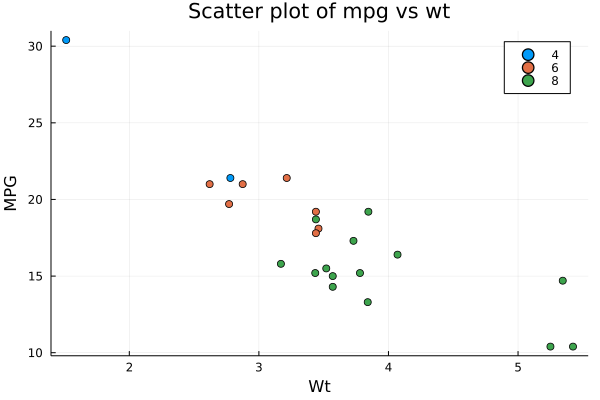

In [58]:
# Basic plotting
# we will use Plots Pkg, other package is Gadfly
# plot() calls line plot
# plot(carsdf3.mpg)
# this uses the dot operator
gr() # Use gr() as backend, other backend are plotly() and 
@df carsdf3 plot(:mpg)
# this allows for using a data frame (in this case carsdf, but preface with @df)
# then pass the plot you want here plot a line plot
# then the name of the column in the data frame, here :mpg
@df carsdf3 plot(:wt, :mpg, group=:cyl_cat,
seriestype=:scatter,
title = "Scatter plot of mpg vs wt",
xlabel = "Wt",
ylabel = "MPG")

# So, series type is where you specify what type of plot to plot